# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations
1. Of the 800 cities sampled, 748 cities were found with current weather information from OpenWeatherMap. Based on the Latitude vs. Max Temperature scatter plot, it's clear that the majority of the cities are found between 30 and 60 degrees latitude with the max temperatures ranging between 50-70 degrees Fahrenheit. The bulk of the warmer max temperature cities seem to be located between 0 and 20 degrees latitude. 
2. Cloud cover is widespread for the same cities that clustered on the warmer side. This could be a result of these cities in particular being in more tropical locations. 
3. The theory of the warmer cities being tropical due to also seeing a large amount of cloud cover does not hold up well when viewing the Latitude vs Humidity % scatter plot. These tropical climate cities would be expected to have high humidity climates, however, it seems that the largest cluster of high humidity cities are are located between 30 and 50 degrees of latitude. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from citipy import citipy
from pprint import pprint
from random import sample
from api_keys import api_key
from datetime import datetime

#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#Perform a weather check on each of the cities using a series of successive API calls.
#Include a print log of each city as it's being processed with the city number and city name.
#Save both a CSV of all data retrieved and png images for each scatter plot.

### Generate Cities List

In [2]:
city_objects = []
city_names = []
city_country_code = []
city_lat = []
city_lng = []

for value in citipy.WORLD_CITIES_DICT.keys():
    lat = value[0]
    lng = value[1]
    city_lat.append(lat)
    city_lng.append(lng)
    city_objects.append(citipy.nearest_city(lat, lng))

for obj in range(len(city_objects)):
    city_names.append(city_objects[obj].city_name)
    city_country_code.append(city_objects[obj].country_code)

mapped = zip(city_lat, city_lng, city_names, city_country_code)
mapped_list = list(mapped)
sample_list = sample(mapped_list, 800)
sample_cities = [city[2] for city in sample_list]
#print(sample_cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# https://api.openweathermap.org/data/2.5/weather?q=London,uk&appid=YOUR_API_KEY
base_url = 'https://api.openweathermap.org/data/2.5/weather?'
weather_cities = []


for index, city in enumerate(sample_cities):
    try:
        weather_request = requests.get(f'{base_url}q={city}&units=imperial&appid={api_key}')
        weather_response = weather_request.json()
        print(f"Processing city record {index} of {len(sample_cities)}. City found: {weather_response['name'].title()}")
        weather_cities.append(weather_response['name'].title())
        time.sleep(1)
    except KeyError:
              print('City not found. Skipping...')


Processing city record 0 of 800. City found: Carapegua
City not found. Skipping...
Processing city record 2 of 800. City found: Bagua Grande
Processing city record 3 of 800. City found: Kiratpur
Processing city record 4 of 800. City found: Baltimore
Processing city record 5 of 800. City found: Yako
Processing city record 6 of 800. City found: Lausanne
Processing city record 7 of 800. City found: Okrisky
Processing city record 8 of 800. City found: Conil
City not found. Skipping...
Processing city record 10 of 800. City found: Gurnee
Processing city record 11 of 800. City found: Abbeville
Processing city record 12 of 800. City found: Cavallino
Processing city record 13 of 800. City found: Chanika
Processing city record 14 of 800. City found: Nouakchott
Processing city record 15 of 800. City found: Shorkot
Processing city record 16 of 800. City found: Viesca
Processing city record 17 of 800. City found: Madison
Processing city record 18 of 800. City found: Plopana
Processing city record 

Processing city record 150 of 800. City found: Shahi
Processing city record 151 of 800. City found: Goksun
Processing city record 152 of 800. City found: Barbatesti
Processing city record 153 of 800. City found: Pittsfield
Processing city record 154 of 800. City found: Altenholz
Processing city record 155 of 800. City found: Nowshera
Processing city record 156 of 800. City found: Albina
Processing city record 157 of 800. City found: Bakewar
Processing city record 158 of 800. City found: Sinamar
Processing city record 159 of 800. City found: Middelburg
Processing city record 160 of 800. City found: Araraquara
Processing city record 161 of 800. City found: Dabrowa Tarnowska
Processing city record 162 of 800. City found: Taft
Processing city record 163 of 800. City found: Petare
Processing city record 164 of 800. City found: Iztapa
Processing city record 165 of 800. City found: Yauco
Processing city record 166 of 800. City found: Beaufort
Processing city record 167 of 800. City found: Nak

Processing city record 299 of 800. City found: Cumbernauld
Processing city record 300 of 800. City found: Bojkovice
Processing city record 301 of 800. City found: Jodar
Processing city record 302 of 800. City found: Jablanica
Processing city record 303 of 800. City found: Alunis
City not found. Skipping...
Processing city record 305 of 800. City found: Nueva Guadalupe
City not found. Skipping...
Processing city record 307 of 800. City found: Fougeres
Processing city record 308 of 800. City found: Kryzhanivka
Processing city record 309 of 800. City found: Vizovice
Processing city record 310 of 800. City found: Paldiski
Processing city record 311 of 800. City found: Burkburnett
Processing city record 312 of 800. City found: Homa Bay
Processing city record 313 of 800. City found: Lamesa
Processing city record 314 of 800. City found: Chenghai
Processing city record 315 of 800. City found: Gamba
Processing city record 316 of 800. City found: Maierus
Processing city record 317 of 800. City f

Processing city record 449 of 800. City found: Ledziny
Processing city record 450 of 800. City found: Lordelo
Processing city record 451 of 800. City found: Novosokolniki
Processing city record 452 of 800. City found: Zafra
Processing city record 453 of 800. City found: Wareham
Processing city record 454 of 800. City found: Nijar
Processing city record 455 of 800. City found: Boyolali
Processing city record 456 of 800. City found: Heers
Processing city record 457 of 800. City found: Pandua
Processing city record 458 of 800. City found: Bar Bigha
Processing city record 459 of 800. City found: Andzhiyevskiy
Processing city record 460 of 800. City found: Waltham
Processing city record 461 of 800. City found: Tra Vinh
Processing city record 462 of 800. City found: Mailag
Processing city record 463 of 800. City found: Lulea
Processing city record 464 of 800. City found: Turgutlu
Processing city record 465 of 800. City found: Nagsaing
Processing city record 466 of 800. City found: Sciacca
Pr

Processing city record 601 of 800. City found: Amreli
Processing city record 602 of 800. City found: Lobez
Processing city record 603 of 800. City found: Tapiogyorgye
Processing city record 604 of 800. City found: Bocas Del Toro
Processing city record 605 of 800. City found: Shiloh
Processing city record 606 of 800. City found: Jaclupan
Processing city record 607 of 800. City found: Adelaide
Processing city record 608 of 800. City found: Daloa
Processing city record 609 of 800. City found: Zavetnoye
Processing city record 610 of 800. City found: Gamut
Processing city record 611 of 800. City found: Kingstown
Processing city record 612 of 800. City found: Westwego
Processing city record 613 of 800. City found: Shatsk
Processing city record 614 of 800. City found: Nagymanyok
Processing city record 615 of 800. City found: Talence
Processing city record 616 of 800. City found: Ellensburg
Processing city record 617 of 800. City found: Rauma
Processing city record 618 of 800. City found: Kule

City not found. Skipping...
Processing city record 752 of 800. City found: Hays
Processing city record 753 of 800. City found: East Haven
Processing city record 754 of 800. City found: Besigheim
Processing city record 755 of 800. City found: Rioja
Processing city record 756 of 800. City found: Leonforte
Processing city record 757 of 800. City found: Skopelos
Processing city record 758 of 800. City found: Lomita
Processing city record 759 of 800. City found: Lloydminster
Processing city record 760 of 800. City found: Conversion
Processing city record 761 of 800. City found: Tarumovka
Processing city record 762 of 800. City found: Sandweiler
Processing city record 763 of 800. City found: Colon
Processing city record 764 of 800. City found: Voznesenye
Processing city record 765 of 800. City found: Stafford
Processing city record 766 of 800. City found: Suesca
Processing city record 767 of 800. City found: San Juan De Opoa
Processing city record 768 of 800. City found: Agbor
Processing cit

In [4]:
len(weather_cities)

748

In [5]:
cloud_cover_percentage = []
countries = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


for city in weather_cities:   
        weather_request = requests.get(f'{base_url}q={city}&units=imperial&appid={api_key}')
        weather_response = weather_request.json()
        cloud_cover_percentage.append(weather_response['clouds']['all'])
        countries.append(weather_response['sys']['country'])
        date.append(datetime.utcfromtimestamp(weather_response['dt']).strftime('%Y-%m-%d %H:%M:%S'))
        humidity.append(weather_response['main']['humidity'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        wind_speed.append(weather_response['wind']['speed'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather_df = pd.DataFrame({
    'City': weather_cities,
    'Cloud Cover Percentage': cloud_cover_percentage,
    'Country': countries,
    'Date': date,
    'Humidity': humidity,
    'Latitude': lat,
    'Longitude': lng,
    'Max Temperature (F)': max_temp,
    'Wind Speed (MPH)': wind_speed
})

In [7]:
city_weather_df.head()

,City,Cloud Cover Percentage,Country,Date,Humidity,Latitude,Longitude,Max Temperature (F),Wind Speed (MPH)
0,Carapegua,0,PY,2019-09-28 03:49:41,59,-25.80,-57.23,66.20,3.36
1,Bagua Grande,37,PE,2019-09-28 03:49:43,83,-5.75,-78.44,63.36,0.92
2,Kiratpur,2,IN,2019-09-28 03:49:43,78,29.50,78.20,77.58,9.31
3,Baltimore,1,US,2019-09-28 03:48:10,64,39.29,-76.61,73.40,10.29
4,Yako,100,BF,2019-09-28 03:49:44,76,12.96,-2.26,77.04,10.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature (9/27/19)')

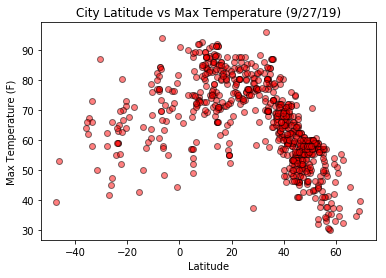

In [20]:
temp_plot = plt.scatter(city_weather_df['Latitude'], city_weather_df['Max Temperature (F)'], c='red', edgecolors='black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (9/27/19)')

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs Humidity % (9/27/19)')

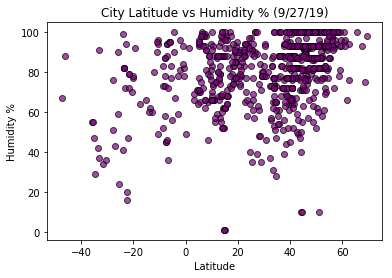

In [26]:
humidity_plot = plt.scatter(city_weather_df['Latitude'], city_weather_df['Humidity'], c='purple', edgecolors='black', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs Humidity % (9/27/19)')

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloud Cover % (9/27/19)')

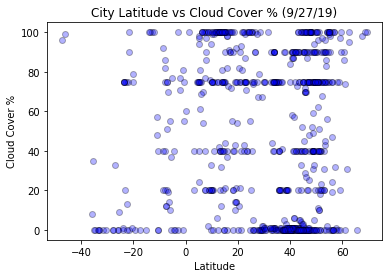

In [29]:
cloud_plot = plt.scatter(city_weather_df['Latitude'], city_weather_df['Cloud Cover Percentage'], c='blue', edgecolors='black', alpha=0.3)
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover %')
plt.title('City Latitude vs Cloud Cover % (9/27/19)')

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs Wind Speed (MPH)')

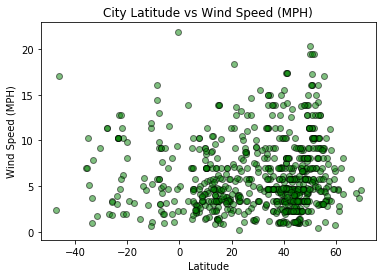

In [30]:
wind_plot = plt.scatter(city_weather_df['Latitude'], city_weather_df['Wind Speed (MPH)'], c='g', edgecolors='black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs Wind Speed (MPH)')